# **Logistic Regression from Scratch on Iris Dataset**

*   This is an interactive python notebook for logistic regression model built from scratch.
* Author: [Anniebhalla16](https://github.com/Anniebhalla16)

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix

# Dataset
from sklearn.datasets import load_iris

## Defining Logistic Regression Model

In [53]:
class LogisticRegression:
  def __init__(self, learning_rate=0.01, number_of_iterations=30000):
    self.learning_rate = learning_rate
    self.number_of_iterations = number_of_iterations


  def train(self, X, y):
    self.m, self.n = X.shape

    self.weights = np.zeros(self.n)
    self.bias = 0

    for _ in range(self.number_of_iterations):

      # Calculate y_hat ie predictions
      y_hat = 1 / (1 + np.exp(-(X.dot(self.weights)+ self.bias)))

      # Calculating derivatives
      dw = (1/self.m) * np.dot(X.T, (y_hat - y))
      db = (1/self.m) * np.sum(y_hat - y)

      # updating weights and bias using gradient descent
      self.weights = self.weights - self.learning_rate * dw
      self.bias = self.bias - self.learning_rate * db


  def predict(self, X):
    y_pred = 1 / (1 + np.exp(-(X.dot(self.weights) + self.bias)))
    return y_pred

# Data Preparation: Iris Dataset
1.   Load iris dataset
2.  Split the dataset for training and testing
3.  Feature Scaling


In [54]:
# 1. Loading iris

X, y = load_iris(return_X_y=True, as_frame=True)

In [55]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [56]:
# 2. Split dataset for train and testing

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [57]:
# 3. Feature Scaling

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model for Setosa ie class Label 0



In [58]:
setosa_model = LogisticRegression()

# Changing class labels for 'Setosa' from '0' to '1' and others to '0'
setosa_y_train = np.where(y_train == 0, 1, 0)

setosa_model.train(X_train, setosa_y_train)

# Calculating the probability for the sample being labelled as 'Setosa'
setosa_pred = setosa_model.predict(X_test)

# Model for class Versicolor i.e. class label 1

In [59]:
versicolor_model = LogisticRegression()

# changing class labels for Versicolor from '1' to '1' and others to '0'
versicolor_y_train = np.where(y_train == 1, 1, 0)

versicolor_model.train(X_train, versicolor_y_train)

# Calculating probability fo the sample being labelled as 'Versicolor'
versicolor_pred = versicolor_model.predict(X_test)


# Model for class Verginica .i.e class label 2

In [60]:
verginica_model = LogisticRegression()

# changing class labels for Verginica from '2' to '1' and others to 0
vergi_y_train = np.where(y_train == 2, 1, 0)

verginica_model.train(X_train, vergi_y_train)

# Calculating the probability for the sample being labelled as 'Verginica'
verginica_pred = verginica_model.predict(X_test)

# Probabilities of class labels for test sample

In [61]:
probabilities = pd.DataFrame({0: setosa_pred , 1: versicolor_pred, 2: verginica_pred})
probabilities.head()

,0,1,2
0,0.998841,0.118167,6.152538e-08
1,0.999152,0.132861,1.106931e-07
2,0.999513,0.032824,2.077467e-07
3,0.991615,0.368650,1.608337e-07
4,0.000600,0.036003,9.934374e-01


# Predicting the class labels for each sample by considering the maximum of probabilities { setosa, versicolor, verginica }

In [62]:
probabilities['pred'] = probabilities.idxmax(axis=1)
y_pred = probabilities['pred']

# Confusion Matrix

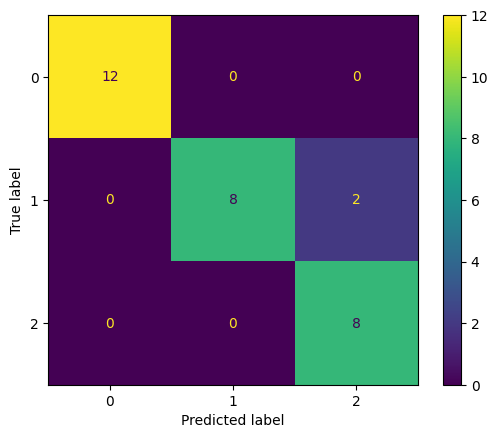

In [63]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp= ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

disp.plot()
plt.show()

# Accuracy

In [64]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9333333333333333
